# L1 and L2 Regularization Assignment | CO2 Emission Dataset

## Introduction of the Dataset

The CO2 Emission of Cars dataset consists of 36 entries with 6 columns: Car, Model, Volume, Weight, CO2, and Unnamed: 5. The dataset primarily includes information on various car models, their engine volume, weight, and corresponding CO2 emissions. The Car and Model columns are categorical, while Volume, Weight, and CO2 are numerical. The Unnamed: 5 column contains no data and can be discarded. This dataset is suitable for exploring the relationship between car characteristics and CO2 emissions using regression techniques, including L1 and L2 regularization.

- Car: Represents the brand or manufacturer of the car (categorical feature).
- Model: Specifies the specific model of the car (categorical feature).
- Volume: Indicates the engine volume in cubic centimeters (cc), reflecting the size of the engine (numerical feature).
- Weight: Represents the car's weight in kilograms (numerical feature).
- CO2: Captures the CO2 emissions of the car in grams per kilometer, which is the target variable for regression analysis (numerical feature).
- Unnamed: 5: An empty column with no data, likely irrelevant and can be dropped from the analysis.

## Import Libraries

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [171]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\DATA.csv")
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


## Basic Information of dataset

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


## Droping Unnamed column

In [173]:
df.drop(columns=['Unnamed: 5'], inplace=True)

## Summary of the dataset

In [174]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


## Checking Missing values in DataFrame

In [175]:
df.isnull().sum()

Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

## Encode Categorical Variables

In [176]:
# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Car'] = label_encoder.fit_transform(df['Car'])
df['Model'] = label_encoder.fit_transform(df['Model'])

df.head()

,Car,Model,Volume,Weight,CO2
0,14,10,1000,790,99
1,10,29,1200,1160,95
2,12,14,1000,929,95
3,2,4,900,865,90
4,9,16,1500,1140,105


- Label Encoding: Encode Car and Model columns, as these are categorical variables.

## Visualizations

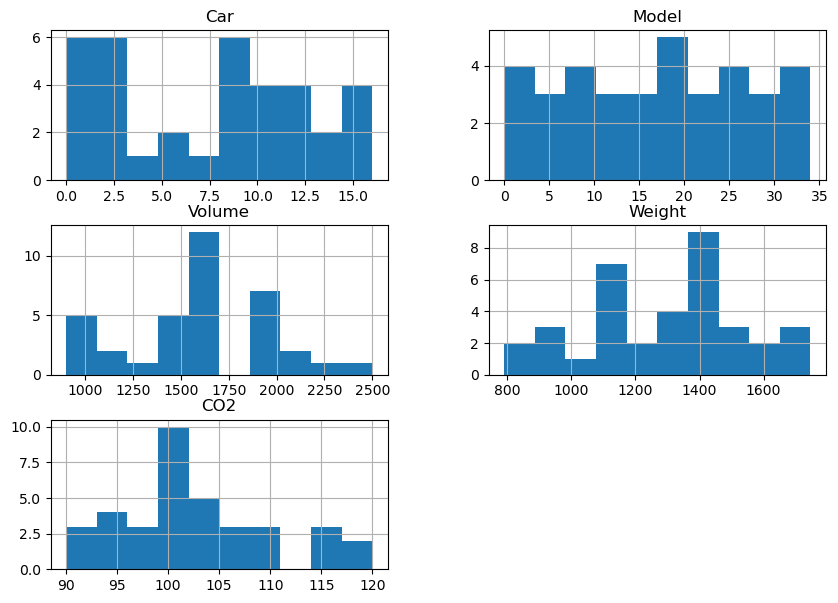

In [177]:
# Plot histograms for numerical features
df.hist(bins=10, figsize=(10, 7))
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


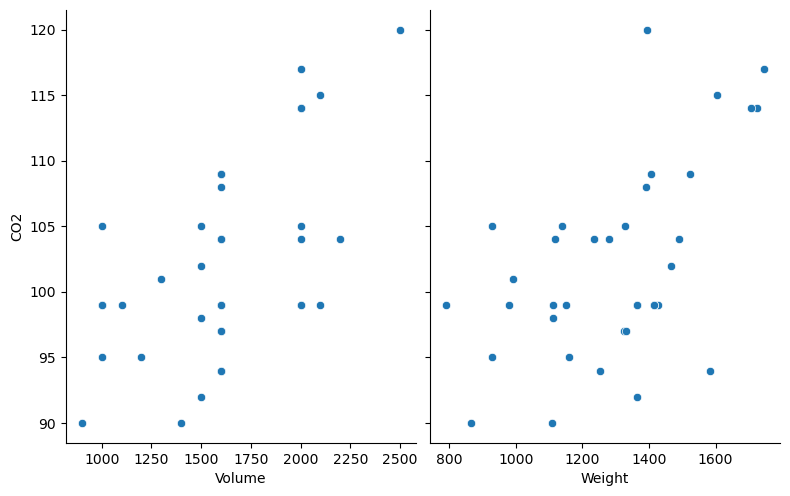

In [178]:
# Scatter plots to analyze relationships
sns.pairplot(df, x_vars=['Volume', 'Weight'], y_vars='CO2', height=5, aspect=0.8, kind='scatter')
plt.show()

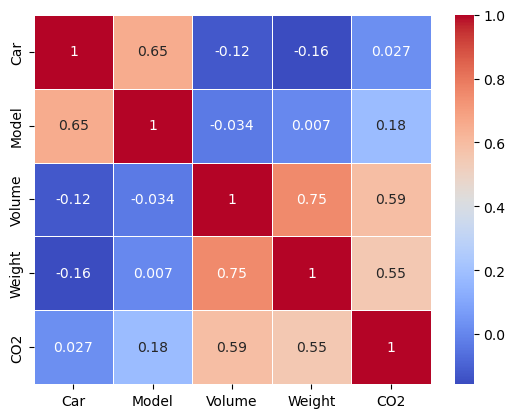

In [179]:
# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

- Histograms: Analyze the distribution of numerical features (Volume, Weight, and CO2) using histograms.
- Scatter Plots: Visualize the relationships between the numerical predictors (Volume, Weight) and the target variable (CO2).
- Correlation Matrix: Based on the correlation matrix, Volume and Weight are likely key predictors for CO2 emissions, as they show a strong positive correlation with the target variable.

## Feature Scaling

In [180]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df[['Volume', 'Weight', 'Car', 'Model']]
y = df['CO2']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Splitting the Dataset

In [181]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (28, 4) (28,)
Testing set shape: (8, 4) (8,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Lasso model

In [182]:
from sklearn.linear_model import Lasso

# Initialize and fit L1 (Lasso) model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
lasso.fit(X_train, y_train)
print(lasso,"\n")

# Training the model on test data
y1_pred = lasso.predict(X_test)
print(y1_pred, "\n")

Lasso(alpha=0.1) 

[106.7563817  101.20918015 104.49387413 105.99881475 101.41366468
 107.10659873 104.43249793  97.7456097 ] 



## Ridge model

In [183]:
from sklearn.linear_model import Ridge

# Initialize and fit L2 (Ridge) model
ridge = Ridge(alpha=0.1)  # Alpha is the regularization strength

# Training the model on training data
ridge.fit(X_train, y_train)
print(ridge,"\n")

# Training the model on test data
y2_pred = ridge.predict(X_test)
print(y2_pred, "\n")

Ridge(alpha=0.1) 

[107.38195849 101.36862354 104.72983151 106.12835296 101.29221797
 107.20505142 104.58150508  97.86068183] 



# Visualization of Lasso (L1) model

Text(0, 0.5, 'Predicted CO2')

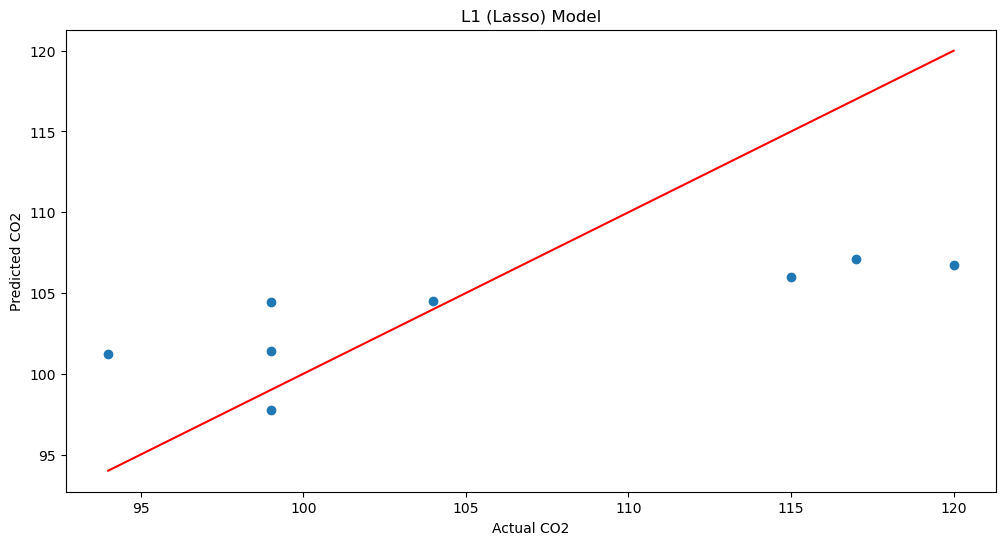

In [184]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 (Lasso) Model')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

# Visualization of Ridge (L2) model

Text(0, 0.5, 'Predicted CO2')

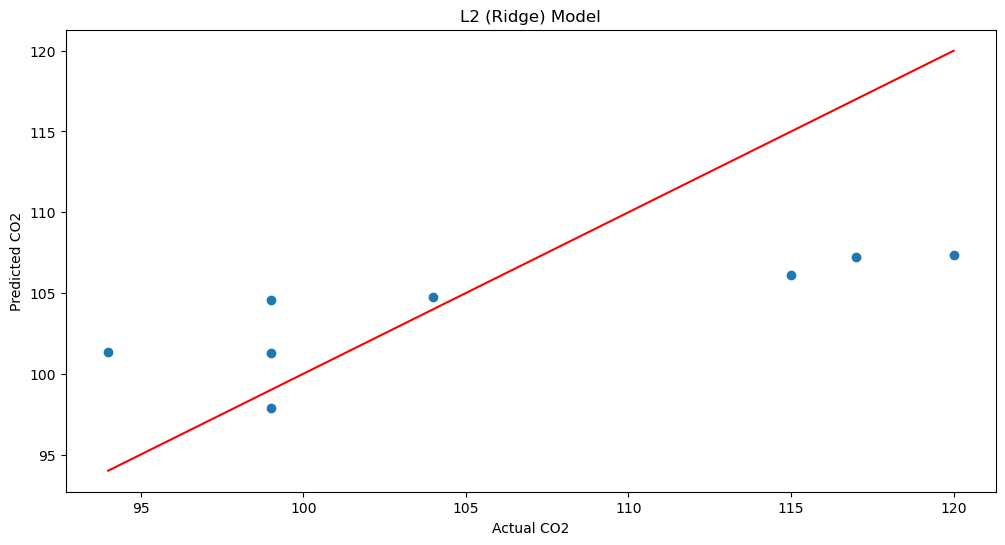

In [185]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L2 (Ridge) Model')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

## Visualization of L1 and L2 model

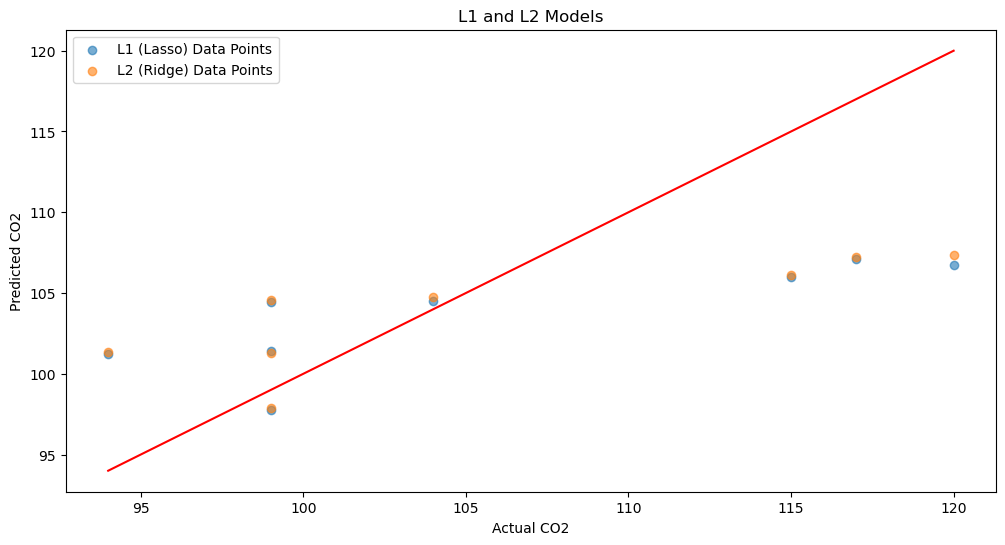

In [186]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred, label='L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred, label='L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('L1 and L2 Models')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.legend()

- Feature Scaling: Used StandardScaler to standardize the features, which helps in improving the performance of the regularization techniques.
- Model Construction: Implemented Lasso (L1) and Ridge (L2) regression models. The alpha parameter controls the regularization strength.
- Prediction and Evaluation: Made predictions on the test set and computed the Mean Squared Error (MSE) for both models.
- Visualization: Plotted scatter plots of actual vs. predicted CO2 emissions for both models and combined the plots for comparison.

## Tune Regularization Parameters

In [187]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search for Lasso (L1) and Ridge (L2) models
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=5)
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit Grid Search
lasso_grid.fit(X_train, y_train)
ridge_grid.fit(X_train, y_train)

# Best parameters and scores
print("L1 (Lasso) Best Alpha:", lasso_grid.best_params_)
print("L1 (Lasso) Best Score:", -lasso_grid.best_score_)
print()
print("L2 (Ridge) Best Alpha:", ridge_grid.best_params_)
print("L2 (Ridge) Best Score:", -ridge_grid.best_score_)


L1 (Lasso) Best Alpha: {'alpha': 1}
L1 (Lasso) Best Score: 38.569845260561564

L2 (Ridge) Best Alpha: {'alpha': 10}
L2 (Ridge) Best Score: 37.203042369823194


- param_grid: Defines the range of alpha values to test.
- GridSearchCV: Performs an exhaustive search over the specified parameter values and evaluates model performance using cross-validation.
- best_params_ and best_score_: Provide the optimal alpha and the corresponding performance score.

## Model Evaluation

In [188]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize non-regularized Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Evaluate non-regularized model
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_mae = mean_absolute_error(y_test, y_lr_pred)
lr_r2 = r2_score(y_test, y_lr_pred)

print(f"Non-Regularized Model MSE: {lr_mse}")
print(f"Non-Regularized Model MAE: {lr_mae}")
print(f"Non-Regularized Model R2: {lr_r2}")
print()

# Evaluate L1 (Lasso) and L2 (Ridge) models
y1_pred_best = lasso_grid.best_estimator_.predict(X_test)
y2_pred_best = ridge_grid.best_estimator_.predict(X_test)

lasso_mse = mean_squared_error(y_test, y1_pred_best)
lasso_mae = mean_absolute_error(y_test, y1_pred_best)
lasso_r2 = r2_score(y_test, y1_pred_best)

ridge_mse = mean_squared_error(y_test, y2_pred_best)
ridge_mae = mean_absolute_error(y_test, y2_pred_best)
ridge_r2 = r2_score(y_test, y2_pred_best)

print(f"L1 (Lasso) Model MSE: {lasso_mse}")
print(f"L1 (Lasso) Model MAE: {lasso_mae}")
print(f"L1 (Lasso) Model R2: {lasso_r2}")
print()
print(f"L2 (Ridge) Model MSE: {ridge_mse}")
print(f"L2 (Ridge) Model MAE: {ridge_mae}")
print(f"L2 (Ridge) Model R2: {ridge_r2}")


Non-Regularized Model MSE: 53.16868668704829
Non-Regularized Model MAE: 6.045917333231451
Non-Regularized Model R2: 0.38610933646561596

L1 (Lasso) Model MSE: 75.17111193210067
L1 (Lasso) Model MAE: 6.691245588962644
L1 (Lasso) Model R2: 0.13206726255557588

L2 (Ridge) Model MSE: 63.15501317496271
L2 (Ridge) Model MAE: 6.29679935085189
L2 (Ridge) Model R2: 0.2708062703955234


Model evaluation measures how well the model performs on unseen data. We use three metrics:

- Mean Squared Error (MSE): Measures the average squared difference between actual and predicted values. Lower MSE indicates better model performance.
- Mean Absolute Error (MAE): Measures the average absolute difference between actual and predicted values. It provides a clearer idea of prediction error magnitude.
- R-squared Score: Indicates the proportion of variance in the target variable that is predictable from the features. Higher R-squared values mean better model fit.

# Visualization of  Optimized Lasso (L1) model

Text(0, 0.5, 'Predicted CO2')

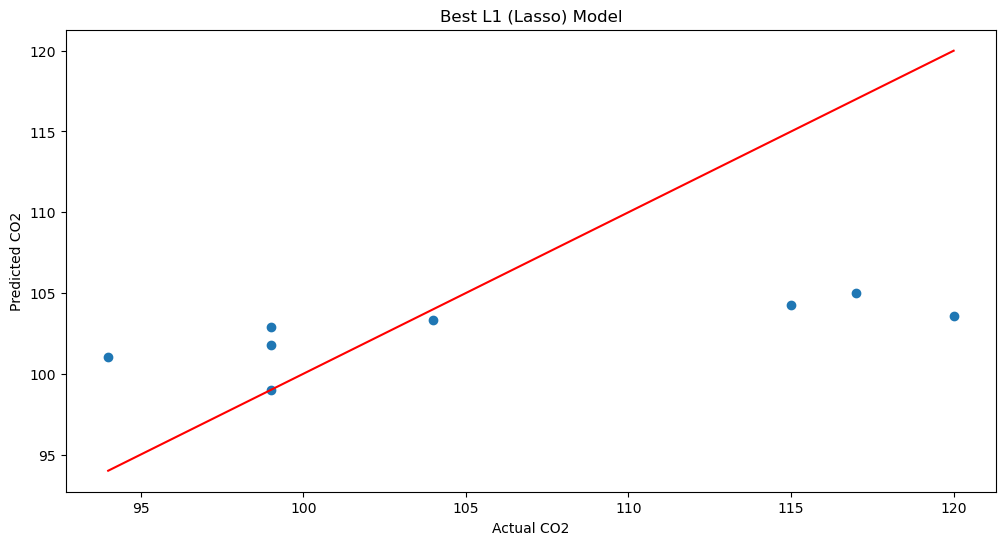

In [189]:
# Best L1 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 (Lasso) Model')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

# Visualization of  Optimized Ridge (L2) model

Text(0, 0.5, 'Predicted CO2')

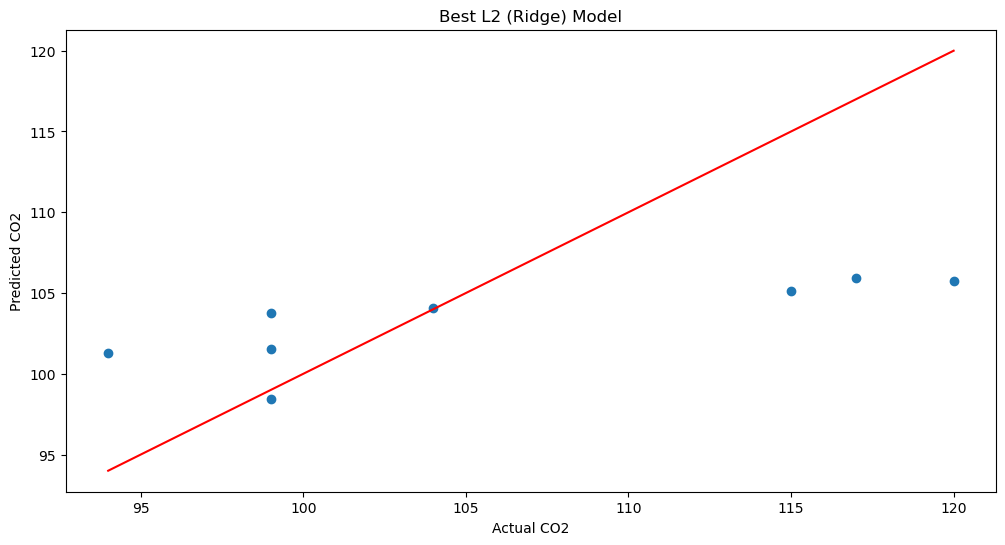

In [190]:
# Best L2 Model
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y2_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L2 (Ridge) Model')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')

# Visualization of Optimized L1 and L2 model

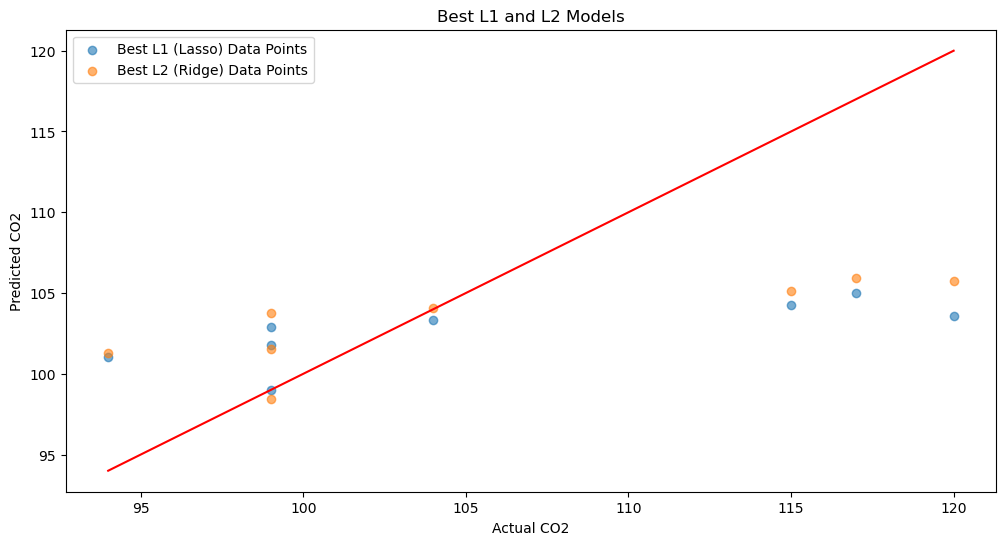

In [191]:
# Best L1 and L2 Model Comparison
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y1_pred_best, label='Best L1 (Lasso) Data Points', alpha=0.6)
plt.scatter(y_test, y2_pred_best, label='Best L2 (Ridge) Data Points', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Best L1 and L2 Models')
plt.xlabel('Actual CO2')
plt.ylabel('Predicted CO2')
plt.legend()

## Summary

- In the analysis of the CO2 Emission of Cars dataset, the non-regularized Linear Regression model achieved the best performance with an MSE of 53.17 and an R-squared score of 0.39. Among regularization techniques, Ridge (L2) regression was more effective than Lasso (L1), with an MSE of 63.16 and an R-squared score of 0.27.
- Visualizations showed that while regularization improved model stability, it did not surpass the non-regularized model in predictive accuracy. Optimization of regularization parameters indicated that Ridge regression, with an alpha of 10, was the most suitable approach for this dataset.